# Project Statement: Diabetes Prediction

In [1]:
# Create environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data set
path = r"G:\DATA SCIENCE-25\SMALL_dataset\ML\supervised\classification\Diabetes-Prediction-App\data_set\diabetes.csv"   # here no header present
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Preprocesing

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


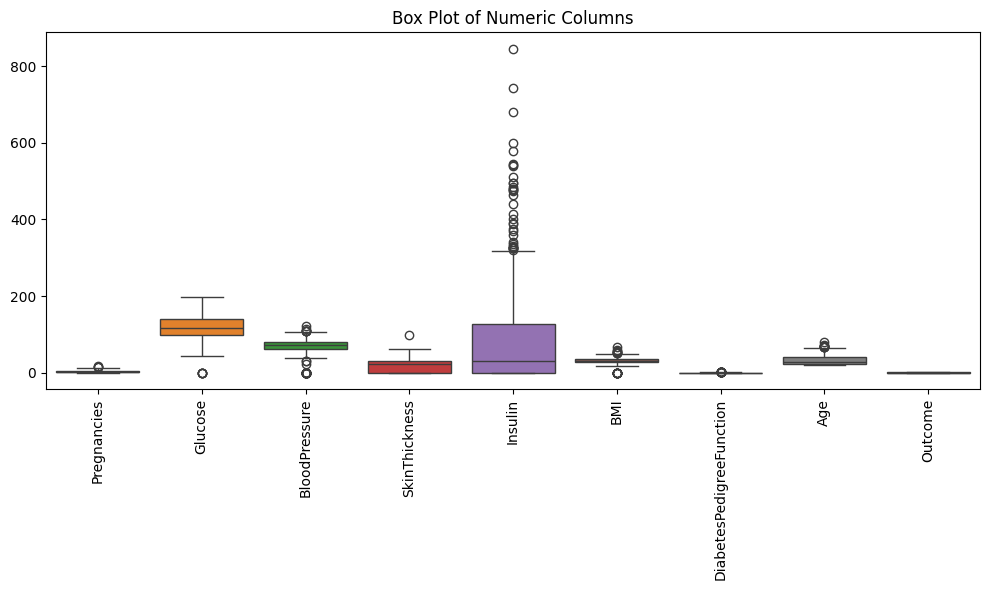

In [7]:
# Create a box plot for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
column_to_cap = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in column_to_cap:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3-Q1
      lower_bound = Q1-1.5*IQR
      upper_bound = Q3+1.5*IQR
      
      df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

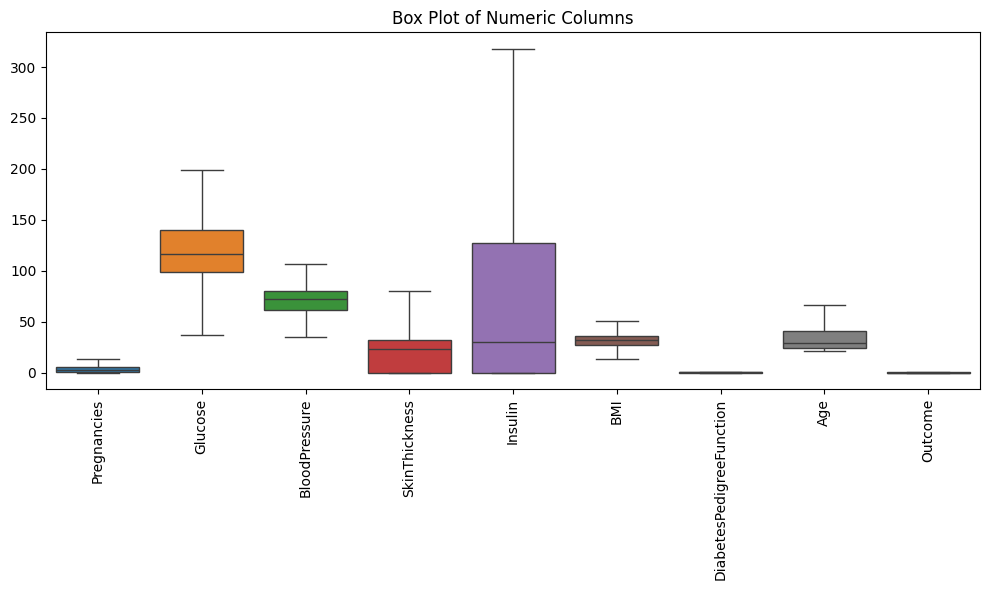

In [10]:
# Create a box plot for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

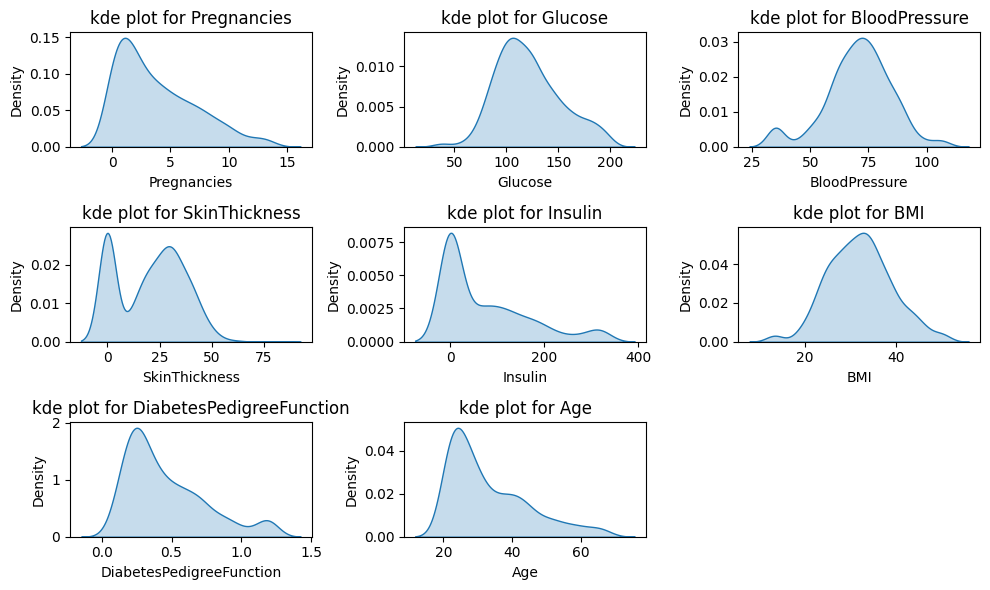

In [11]:
column_to_cap = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(10,6))
for i, col in enumerate(column_to_cap,1):
      
      plt.subplot(3,3,i)
      sns.kdeplot(x=df[col], fill=True)
      plt.title(f"kde plot for {col}")
      
plt.tight_layout()
plt.show()

In [12]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.202750,69.508000,19.664000,65.113750,30.527500,0.420264,31.135000
1,4.843284,141.534515,72.880597,22.093284,89.583489,35.105597,0.531022,37.052239


Non diabetic person    500
Daibetic person        268
Name: count, dtype: int64


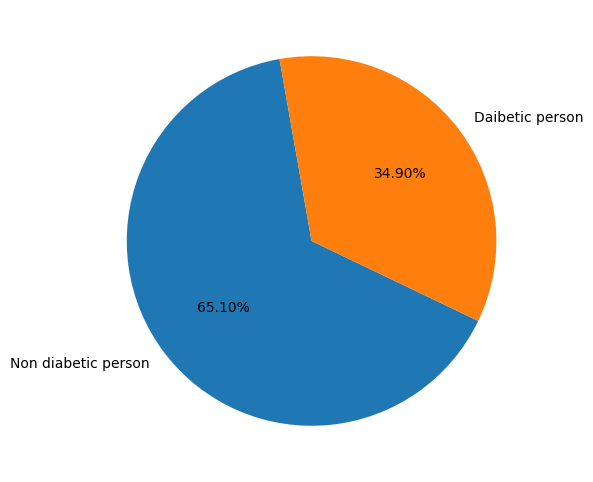

In [13]:
value_count = df['Outcome'].value_counts()
value_count.index = ['Non diabetic person', "Daibetic person"]
print(value_count)

plt.figure(figsize=(10,6))
plt.pie(value_count, labels =value_count.index,  autopct= '%1.2f%%',startangle =100)
plt.show()

In [14]:
from scipy import stats

for column in df.columns:
    skewness = df[column].skew()
    
    if skewness > 0:
        skew_type = "Right-skewed"
    elif skewness < 0:
        skew_type = "Left-skewed"
    else: 
        skew_type = "Approximately normally distributed"

    print(f"Column {column}: skewness = {skewness}, Distribution = {skew_type}")

Column Pregnancies: skewness = 0.8539617478323778, Distribution = Right-skewed
Column Glucose: skewness = 0.4179462206775283, Distribution = Right-skewed
Column BloodPressure: skewness = -0.4060355281846069, Distribution = Left-skewed
Column SkinThickness: skewness = 0.02666298054109206, Distribution = Right-skewed
Column Insulin: skewness = 1.1738981213083215, Distribution = Right-skewed
Column BMI: skewness = 0.13580859812143145, Distribution = Right-skewed
Column DiabetesPedigreeFunction: skewness = 1.0244278033317116, Distribution = Right-skewed
Column Age: skewness = 1.0671703233262797, Distribution = Right-skewed
Column Outcome: skewness = 0.635016643444986, Distribution = Right-skewed


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1


What are the reasons to use StandardScaler or Min-Max Scaler:
Use StandardScaler for data with outliers or when the data is approximately normally distributed.
Use min-max scaling (Normalizer) to scale the data within a specific range, especially if you have non-normally distributed data.

# For Deployment to create cleaned Data Set

In [16]:
df.to_csv(r"G:\DATA SCIENCE-25\SMALL_dataset\ML\supervised\classification\Diabetes-Prediction-App\data_set\Cleaned_data.csv")

# Modeling & Evaluation

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [18]:
X = df.drop(columns = 'Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.1, random_state =42)

In [19]:
s_sc = StandardScaler()
s_sc.fit_transform(X)

array([[ 0.64714967,  0.86192556,  0.09269135, ...,  0.20935933,
         0.58892732,  1.44569096],
       [-0.84896998, -1.15943299, -0.33020145, ..., -0.78425421,
        -0.37810147, -0.189304  ],
       [ 1.24559754,  1.98490253, -0.47116571, ..., -1.25267202,
         0.74659506, -0.10325164],
       ...,
       [ 0.34792574, -0.00437096,  0.09269135, ..., -0.84103213,
        -0.74949659, -0.27535637],
       [-0.84896998,  0.15605432, -0.75309424, ..., -0.28744744,
        -0.38510892,  1.18753386],
       [-0.84896998, -0.90275254, -0.04827292, ..., -0.24486401,
        -0.50423566, -0.87772293]])

# 1. LogisticRegression

In [20]:
lr =  LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [22]:
accuracy_train_lgr = accuracy_score(y_train,y_pred_train)
accuracy_test_lgr = accuracy_score(y_test,y_pred_test)
cm = confusion_matrix(y_test,y_pred_test)

print("Accuracy on train-lgr :", accuracy_train_lgr)
print("Accuracy on test-lgr :", accuracy_test_lgr)
print("Confusion Matrix-lgr :\n", cm)
print("For LogisticRegression:", classification_report(y_test,y_pred_test))

Accuracy on train-lgr : 0.7756874095513748
Accuracy on test-lgr : 0.7272727272727273
Confusion Matrix-lgr :
 [[38 12]
 [ 9 18]]
For LogisticRegression:               precision    recall  f1-score   support

           0       0.81      0.76      0.78        50
           1       0.60      0.67      0.63        27

    accuracy                           0.73        77
   macro avg       0.70      0.71      0.71        77
weighted avg       0.74      0.73      0.73        77



In [23]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(lr, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.76623377 0.7987013  0.78571429 0.77777778 0.78431373]
Mean Accuracy: 0.7825481707834648


# 2. RandomForestClassifier

In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [26]:
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
cm = confusion_matrix(y_test,y_pred_test_rf)

print("Accuracy on train-rf :", accuracy_train_lgr)
print("Accuracy on test-rf :", accuracy_test_lgr)
print("Confusion Matrix-rf :\n", cm)
print("For RandomForestClassifier:", classification_report(y_test,y_pred_test_rf))

Accuracy on train-rf : 0.7756874095513748
Accuracy on test-rf : 0.7272727272727273
Confusion Matrix-rf :
 [[38 12]
 [10 17]]
For RandomForestClassifier:               precision    recall  f1-score   support

           0       0.79      0.76      0.78        50
           1       0.59      0.63      0.61        27

    accuracy                           0.71        77
   macro avg       0.69      0.69      0.69        77
weighted avg       0.72      0.71      0.72        77



In [27]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.79220779 0.77272727 0.75324675 0.75816993 0.73856209]
Mean Accuracy: 0.7629827688651218


# 3. SVC

In [28]:
svm = SVC(kernel='linear',C=1.0, random_state =42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [29]:
y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

In [30]:
accuracy_train_svm = accuracy_score(y_train,y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test,y_pred_test_svm)
cm_svm = confusion_matrix(y_test,y_pred_test_svm)

print("Accuracy on train-svm :", accuracy_train_svm)
print("Accuracy on test-svm :", accuracy_test_svm)
print("Confusion Matrix-svm :\n", cm_svm)
print("For SVM:", classification_report(y_test,y_pred_test_svm))

Accuracy on train-svm : 0.7771345875542692
Accuracy on test-svm : 0.7402597402597403
Confusion Matrix-svm :
 [[39 11]
 [ 9 18]]
For SVM:               precision    recall  f1-score   support

           0       0.81      0.78      0.80        50
           1       0.62      0.67      0.64        27

    accuracy                           0.74        77
   macro avg       0.72      0.72      0.72        77
weighted avg       0.75      0.74      0.74        77



In [31]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(svm, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.75324675 0.78571429 0.77272727 0.77777778 0.76470588]
Mean Accuracy: 0.7708343943638061


# 4. XGB

In [32]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

In [34]:
accuracy_train_xgb = accuracy_score(y_train,y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test,y_pred_test_xgb)
cm_xgb = confusion_matrix(y_test,y_pred_test_xgb)

print("Accuracy on train-xgb :", accuracy_train_xgb)
print("Accuracy on test-xgb :", accuracy_test_xgb)
print("Confusion Matrix-xgb :\n", cm_xgb)
print("For xgb:", classification_report(y_test,y_pred_test_xgb))

Accuracy on train-xgb : 1.0
Accuracy on test-xgb : 0.7142857142857143
Confusion Matrix-xgb :
 [[36 14]
 [ 8 19]]
For xgb:               precision    recall  f1-score   support

           0       0.82      0.72      0.77        50
           1       0.58      0.70      0.63        27

    accuracy                           0.71        77
   macro avg       0.70      0.71      0.70        77
weighted avg       0.73      0.71      0.72        77



In [35]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation results
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.74025974 0.75974026 0.73376623 0.73202614 0.67320261]
Mean Accuracy: 0.7277989983872336


Remark: The Random Forest classifier has proven to be a highly effective model for the task of diabetes prediction. The model's performance, as evidenced by the confusion matrix and evaluation metrics, demonstrates its capability in accurately classifying individuals into 'diabetes yes' or 'diabetes no'."

# Save model for Deployment

In [36]:
import pickle
file_name = r"svm_model.sav"
pickle.dump(svm, open(file_name, 'wb'))

In [40]:
# loading the saved model
db_model = pickle.load(open(r'G:\DATA SCIENCE-25\SMALL_dataset\ML\supervised\classification\Diabetes-Prediction-App\svm_model.sav', 'rb'))

# Making a Predictive System

In [41]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [42]:
import numpy as np

# Prompt the user for input for each feature
pregnancies = float(input("Enter the number of pregnancies: "))
glucose = float(input("Enter the glucose level: "))
blood_pressure = float(input("Enter the blood pressure: "))
skin_thickness = float(input("Enter the skin thickness: "))
insulin = float(input("Enter the insulin level: "))
bmi = float(input("Enter the BMI: "))
diabetes_pedigree_function = float(input("Enter the Diabetes Pedigree Function: "))
age = float(input("Enter the age: "))

# Create an input data array
input_data = np.array([pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age])

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data.reshape(1, -1)

# Make a prediction using the RandomForest model
prediction = db_model.predict(input_data_reshaped)

# Check the prediction and provide an appropriate response
if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is not diabetic
